# M49 - AD - ESTEFANIA ZAVALA

Antes de empezar

En este ejercicio usarás una base de datos pública para revisar la estructura básica y construirás un script en Python para importar una colección de tweets.  Finalmente se usarás filtros para búsqueda de información.



Paso a paso:

Generar un archivo tipo tipo Python que contenga la salida de los siguientes ejercicios aplicados:
* Conexión a la Plataforma seleccionada de bases de datos no relacionales.
* Generar una nueva base de datos.
* Explorar el archivo de tweets (en Anexos) con palabras clave definidas para el caso (incluir 5).
* Importar por lo menos 1000 tweets a la base de datos a una nueva estructura.
* Construir 2 filtros de búsqueda que se considere importante dentro de la base de datos de tweets proporcionada.
* Obtener screenshots de cada caso de uso requerido

____________________________________________________________________________________
## Setup

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

_____________________________________________________________
## Lectura del archivo

In [3]:
os.chdir('C:/Users/estef/Desktop/data')
df = pd.read_csv('TWEETS.csv')
df.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
9371,569967808446009345,negative,1.0000,Customer Service Issue,0.6805,US Airways,NaN,ElmiraBudMan,NaN,0,@USAirways if you actually cared about what yo...,NaN,2015-02-23 13:11:29 -0800,Does it really matter,NaN
3035,568786745715757056,positive,1.0000,NaN,NaN,United,NaN,georgev27,NaN,0,@united Please send me the link/email to forma...,NaN,2015-02-20 06:58:22 -0800,"Lehigh Valley, PA",NaN
14595,569593694963310593,negative,0.6541,Customer Service Issue,0.6541,American,NaN,otisday,NaN,0,@AmericanAir @ShannonBloom Where's my DM? Wher...,NaN,2015-02-22 12:24:54 -0800,Pekin,Eastern Time (US & Canada)
11019,568608132731154432,negative,1.0000,Can't Tell,1.0000,US Airways,NaN,Allisonjones704,NaN,0,@USAirways the least you could do is make up f...,NaN,2015-02-19 19:08:37 -0800,NaN,NaN
2534,569120847115501568,neutral,1.0000,NaN,NaN,United,NaN,AviNewYork,NaN,0,@united First Officer of UA 1514 checking our ...,"[18.4710809, -68.39995916]",2015-02-21 05:05:58 -0800,NaN,Eastern Time (US & Canada)


_________________________________
## Exploratory data analysis

In [4]:
df.shape

(14640, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Encontrar valores nulos

In [6]:
df.isnull().sum()
# las columnas relacionadas a 'gold' tienen en su mayoría datos nulos por lo que podrían eliminarse

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Identificar valores únicos por columna para verificar si se pueden transformar en categorías

In [7]:
df.nunique()
# Se identifica columna tipo ID (tweet_id) por lo que será eliminada
# Algunas columnas serán transformadas en categorías reemplazando las cadenas por valores numéricos (airline_sentiment,airline_sentiment_gold)

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [9]:
print(df['airline_sentiment'].value_counts())
print('')
print(df['negativereason'].value_counts())
print('')
print(df['airline'].value_counts())
print('')

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64



In [10]:
print(df['airline_sentiment_gold'].value_counts())
print('')
print(df['negativereason_gold'].value_counts())


airline_sentiment_gold
negative    32
positive     5
neutral      3
Name: count, dtype: int64

negativereason_gold
Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nLost Luggage                    1
Late Flight\nFlight Attendant Complaints     1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: count, dtype: int64


______________________
# Modificación de df original para facilitar su manejo

In [11]:
#Generar copia de df
df2 = df.copy()
#Eliminar columnas 
df2.drop('tweet_id', axis=1, inplace = True) #Tipo ID
df2.drop('airline_sentiment_gold', axis=1, inplace = True) #Poco representativa
df2.drop('negativereason_gold', axis=1, inplace = True) #Poco representativa

#Reemplazar cadenas por valores numéricos y objetos por categorías
###df2.airline_sentiment = df2.airline_sentiment.astype('category').cat.codes
df2['airline_sentiment'] = df2['airline_sentiment'].replace({'negative':1,'positive':2,'neutral':0}, regex=True).astype('category').cat.codes

# Visualización de las modificaciones
df2.sample(5)


C:\Users\estef\AppData\Local\Temp\ipykernel_18880\2903782232.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['airline_sentiment'] = df2['airline_sentiment'].replace({'negative':1,'positive':2,'neutral':0}, regex=True).astype('category').cat.codes


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
2033,1,1.0,Customer Service Issue,0.6783,United,chivo2089,0,@united you told me you changed my flight and ...,NaN,2015-02-22 03:12:21 -0800,Guatemala,NaN
5250,0,1.0,NaN,NaN,Southwest,LIMacArthur,0,@SouthwestAir and @USAirways have Cancelled Fl...,NaN,2015-02-21 12:30:37 -0800,"Ronkonkoma, NY",Quito
6321,1,1.0,Customer Service Issue,0.6759,Southwest,luvthispayne,0,@SouthwestAir This experience was the worse fl...,NaN,2015-02-18 06:34:51 -0800,Somewhere over the rainbow.,Atlantic Time (Canada)
5329,0,1.0,NaN,NaN,Southwest,jenicalindy,0,@SouthwestAir when does today's scavenger hunt...,NaN,2015-02-21 09:26:23 -0800,"Salt Lake City, UT",NaN
4106,1,1.0,Late Flight,1.0000,United,cslhilo,1,@united You make it hard to fly with you. Dela...,NaN,2015-02-17 15:05:04 -0800,"Hilo, HI",Hawaii


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  int8   
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   name                          14640 non-null  object 
 6   retweet_count                 14640 non-null  int64  
 7   text                          14640 non-null  object 
 8   tweet_coord                   1019 non-null   object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(1), int8(1), object(8)
memory usage: 1.

#### Verificar si los tweets con opiniones positivas (2) o neutras (0) cuentan con un dato nulo en la columna negativereason

In [13]:
#Opiniones positivas con información en negativereason = 0
df2[(df2['airline_sentiment'] == 2) & (pd.notna(df2['negativereason']))]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [14]:
#Opiniones neutras con información en negativereason = 0
df2[(df2['airline_sentiment'] == 0) & (pd.notna(df2['negativereason']))]

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


In [15]:
#Opiniones negativas SIN información en negativereason
df2[(df2['airline_sentiment'] == 1) & (pd.isna(df2['negativereason']))]
# Todos los tweets donde la opinión era negativa cuentan con algo de información del motivo 

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone


<Axes: title={'center': 'Opiniones recibidas por aerolínea'}, xlabel='airline'>

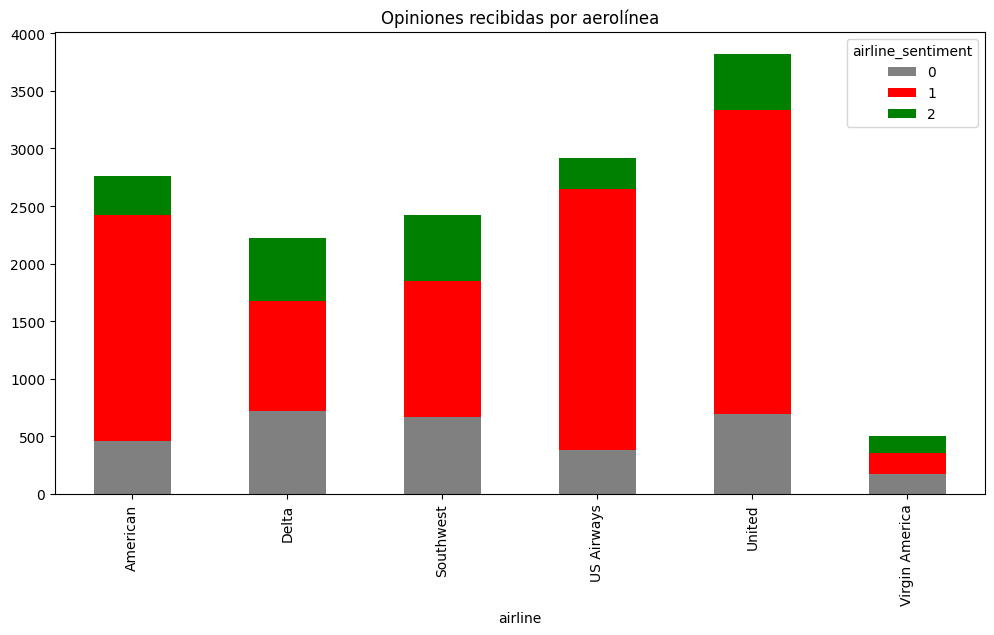

In [ ]:
# Contar opiniones por aerolínea y opinión
#sentiment_counts = df2.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

# Crear la gráfica
#sentiment_counts.plot(kind='bar', figsize=(12, 6), stacked=True, color=['green', 'red', 'gray'])

df2.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=4).plot(kind='bar', figsize=(12, 6), stacked=True, color=['gray', 'red', 'green'], title='Opiniones recibidas por aerolínea')

<Axes: title={'center': 'Razones por las que el cliente tuvo una mala experiencia'}, xlabel='negativereason'>

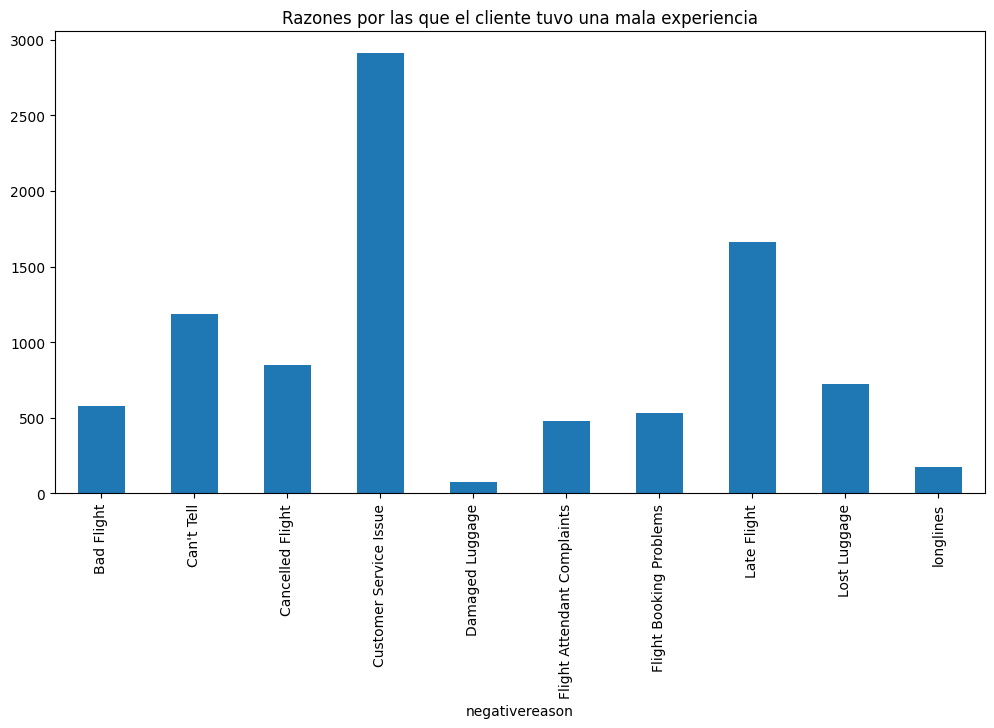

In [ ]:
df2.groupby('negativereason').size().plot(kind='bar', figsize=(12, 6), stacked=False, title='Razones por las que el cliente tuvo una mala experiencia')

#### Tweets que contienen la palabra 'Luggage'

In [31]:
#Para mostrar el texto de los tweets completo
pd.set_option('display.max_colwidth', None)
df2[df2['text'].str.contains('Luggage', case=False, na=False)].sample(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14203,1,1.0,Lost Luggage,0.6542,American,cbratch67,0,@AmericanAir You can't get us to Cincy but our luggage will still go there tonight? Stranded us in Dallas for 2 days w/o clothes? #Yousuck,NaN,2015-02-22 16:26:45 -0800,NaN,NaN
13046,1,1.0,Lost Luggage,1.0000,American,GrrraceSM,0,"@AmericanAir Oh, and losing my luggage #ridiculous # angrybird # where'smybag",NaN,2015-02-23 12:09:39 -0800,London,NaN
7959,1,1.0,Late Flight,1.0000,Delta,greggweiss,0,@JetBlue Any option for luggage assistance on the ground at HPN? Flight 2168 delayed 2+ hours &amp; we will have 2 sleeping kids when we land,NaN,2015-02-20 16:22:54 -0800,"Hastings on Hudson, NY",Eastern Time (US & Canada)
14615,1,1.0,Cancelled Flight,1.0000,American,tim_sheehy,0,@AmericanAir ugh Dump us in dfw w/no luggage then Cancelled Flight our flight 3 more times. Sat arrival now Tue?,NaN,2015-02-22 12:16:18 -0800,Washington DC,Central Time (US & Canada)
13720,1,1.0,Lost Luggage,0.6416,American,LeslieWolfson,0,@AmericanAir you have now lost my luggage for40 hours holding for4 hrs on phone #wtf is this how you treat your loyal passengers?#stranded,NaN,2015-02-22 21:53:49 -0800,Miami Beach,Central Time (US & Canada)


#### Tweets que contienen la palabra 'late'

In [32]:
df2[df2['text'].str.contains('late', case=False, na=False)].sample(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
9040,1,0.6674,Late Flight,0.6674,US Airways,SteveBass2,0,"@USAirways ...2 hours on the plane, they at least got us on a direct flight a couple hours Late Flightr on United","[40.6954621, -74.1733106]",2015-02-24 09:24:57 -0800,NaN,NaN
9237,1,1.0000,Late Flight,1.0000,US Airways,tlawler28,0,@USAirways @PhilaCarService looks like a long trip from cancun to philly? 9 hours Late Flight? Seriously?,NaN,2015-02-23 18:10:43 -0800,NaN,Eastern Time (US & Canada)
11211,2,0.6931,NaN,0.0000,US Airways,CakeNDeath,0,@USAirways thanks for slowing the inbound plane down so that we didn't need to worry about 4438 EYW being Late Flight. Great holz ahead. Cheers! 😀,"[35.2204278, -80.94281752]",2015-02-19 06:55:18 -0800,Old City Philly,NaN
1786,1,1.0000,Late Flight,0.3594,United,PatrickGrubbe,1,"@united CMH gate staff a disaster..#3345 overbooked, no volunteers, no boarding, 20 min Late Flight trying to figure out issue #bringbackrealstaff",NaN,2015-02-22 11:55:48 -0800,"Lewis Center, OH",Eastern Time (US & Canada)
3057,1,1.0000,Bad Flight,0.3617,United,iampaz,0,"@united Too Late Flight, damage has been done. Easily the worst airline experience of my life. Missed two connecting flights &amp; days of work. #UA49",NaN,2015-02-20 05:13:27 -0800,FUCK CANCER,Central Time (US & Canada)


#### Tweets que contienen la palabra 'long line'

In [36]:
df2[df2['text'].str.contains('long line', case=False, na=False)].sample(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
13079,1,1.0000,Cancelled Flight,0.6584,American,ImprotaD,0,@AmericanAir I have the app - after my nonsense flight Cancelled Flightation yesterday I wasn't able to use the app or kiosk today. Hour long line.,NaN,2015-02-23 11:40:05 -0800,NaN,NaN
9850,1,0.6403,longlines,0.6403,US Airways,DPodgorny,0,@USAirways What is happening at Reagan Airport DCA? Long lines and four people working checkIn! #unhappy #DCA,NaN,2015-02-22 15:31:48 -0800,NaN,Quito
507,1,1.0000,Late Flight,1.0000,United,lsalazarll,0,@united Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united,NaN,2015-02-24 11:39:25 -0800,NaN,Mountain Time (US & Canada)
2493,1,1.0000,longlines,0.6706,United,smallestnode,0,@united bad idea to let 200 people back on the terminal with food vouchers but allow only 15 minutes to get anything. Long lines!! #ua1523,NaN,2015-02-21 08:13:27 -0800,"Boston, MA",NaN
4457,1,1.0000,Late Flight,0.6743,Southwest,JLPoeschl,0,"@SouthwestAir Switching planes due to mechanical problems. How does reboarding work? Was A49, now at end of long line. Stuck in middle?",NaN,2015-02-24 07:34:59 -0800,NaN,NaN


#### Tweets que contienen la palabra 'booking'

In [37]:
df2[df2['text'].str.contains('booking', case=False, na=False)].sample(5)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
8121,2,1.0000,NaN,NaN,Delta,m1ss_DefJam,0,@JetBlue haha no need to apologize 😁 I'll be Flight Booking Problems sooner than Late Flightr. I love JetBlue,NaN,2015-02-20 05:37:06 -0800,Orlando - ΜΣΥ,Eastern Time (US & Canada)
10914,1,0.6232,Can't Tell,0.3189,US Airways,Chrisp2281,0,@USAirways I'm logged into a Flight Booking Problems. I need to add API before travelling to the states but I cannot see where to do it,NaN,2015-02-20 07:00:13 -0800,"Dublin, Ireland",Casablanca
121,1,1.0000,Flight Booking Problems,0.6767,Virgin America,usagibrian,0,"@VirginAmerica And now the flight Flight Booking Problems site is totally down. Folks, what is the problem?",NaN,2015-02-22 22:11:07 -0800,San Francisco CA,Pacific Time (US & Canada)
484,1,1.0000,Customer Service Issue,1.0000,Virgin America,RyScanlon,0,@VirginAmerica Grouping Virgin in with the others now. BOS weather has exposed their actual Cus Serv model. Never Flight Booking Problems with Virgin again!,NaN,2015-02-17 12:38:33 -0800,NaN,Atlantic Time (Canada)
5601,0,0.6737,NaN,0.0000,Southwest,EamonFI,0,@SouthwestAir can one use a companion pass w/ a points Flight Booking Problems or is it only cash fares? Thx!,NaN,2015-02-20 12:51:44 -0800,San Francisco,Quito
